# SHAP values

Deep SHAP is a high-speed approximation algorithm for SHAP values in deep learning models that builds on a connection with DeepLIFT described in the SHAP NIPS paper. 

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

import shap

from tensorflow.keras.models import load_model

DATA_DIR = '../Datasets/'
MODELS_DIR = '../Models/'

TRAIN_PATH = DATA_DIR + '/Dataset_train.csv'
TEST_PATH = DATA_DIR + '/Dataset_test.csv'

TRAIN_CF_PATH = DATA_DIR + '/Dataset_train_CF.csv'
TEST_CF_PATH = DATA_DIR + '/Dataset_test_CF.csv'

MODEL_PATH = MODELS_DIR + 'Pres_hybrid.h5'
MODEL_CF_PATH = MODELS_DIR + 'Pres_hybrid_CF.h5'

Load datasets and model, then fit explainer and show SHAP values:

In [5]:
def show_shap_values(train_path, test_path, model_path):
    
    model = load_model(model_path)

    X_train = pd.read_csv(train_path, index_col=0)
    X_test = pd.read_csv(test_path, index_col=0)

    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)

    print(X_train.shape)
    print(X_test.shape)

    bg_train = X_train.sample(n=100, replace=False).to_numpy()
    bg_test = X_test.sample(n=100, replace=False).to_numpy()

    # explainer = shap.Explainer(model.predict, background)
    explainer = shap.DeepExplainer(model, bg_train)
    shap_values = explainer.shap_values(bg_test)

    shap.summary_plot(shap_values, feature_names=X_train.columns, plot_type='bar')

All variables model:

2024-01-22 14:49:45.226640: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-22 14:49:45.227286: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(482119, 16)
(120530, 16)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


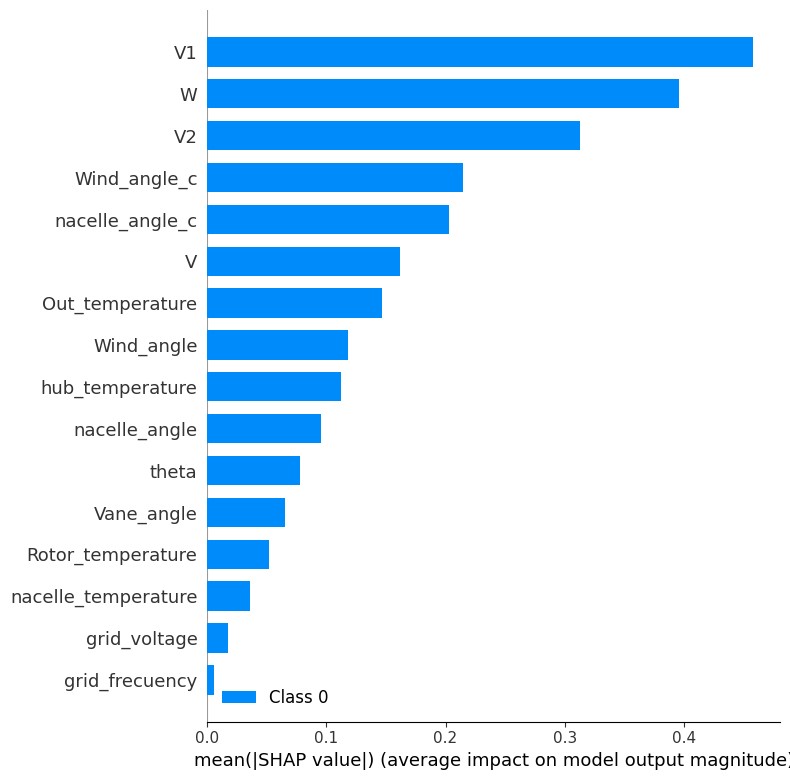

In [6]:
show_shap_values(TRAIN_PATH, TEST_PATH, MODEL_PATH)

Reduced model (correlation filter):

(482119, 13)
(120530, 13)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


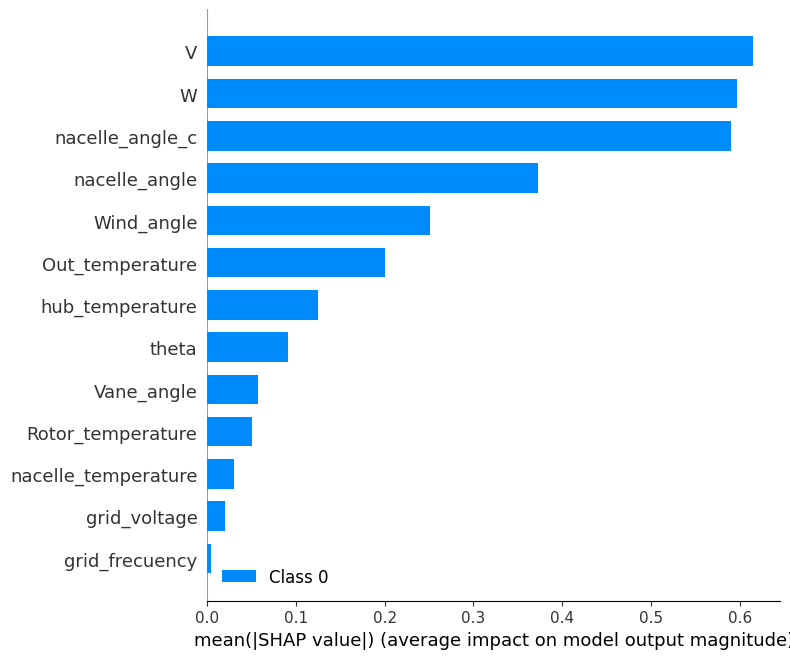

In [7]:
show_shap_values(TRAIN_CF_PATH, TEST_CF_PATH, MODEL_CF_PATH)